In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
# secret_number = '101001'
secret_number = '111000'

In [3]:

circuit = QuantumCircuit(len(secret_number) + 1, len(secret_number))

# circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secret_number)))

circuit.x(len(secret_number))
circuit.h(len(secret_number))

circuit.barrier()

for i, n in enumerate(secret_number[::-1]):
    if n == '1':
        circuit.cx(i, len(secret_number))
# circuit.cx(3, 6)
# circuit.cx(0, 6)

circuit.barrier()
circuit.h(range(len(secret_number)))
circuit.barrier()
circuit.measure(range(len(secret_number)), range(len(secret_number)))

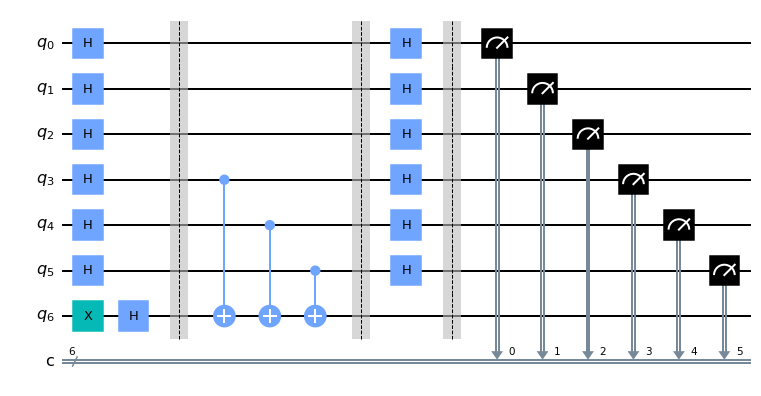

In [4]:
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
res = execute(circuit, backend=simulator, shots=1).result()
counts = res.get_counts()
print(counts)

{'111000': 1}
